In [ ]:
# Install the required libraries
!pip install prophet
!pip install hvplot


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/262.6 kB ? eta -:--:--
   ------------------------------- -------- 204.8/262.6 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 262.6/262.6 kB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
   --- ------------------------------------ 0.4/4.7 MB 11.2 MB/s eta 0:00:01
   ----- ---------------------------------- 0.7/4.7 MB 10.9 MB/s eta 0:00:01
   ----------- ---------------------------- 1.4/4.7 MB 11.1 MB/s eta 0:00:01
   ---------------- ----------------------- 1.9/4.7 MB 11.1 MB/s eta 0:00:01
   --------------------- ------------------ 2.5/4.7 MB 11.4 MB/s eta 0:00:01
   ------------------------- -------------- 3.1/4.7 MB 11.5 MB/s eta 0:00:01
   ------------------------------ --------- 3.6/4.7 MB 11.5 MB/s eta 0:00:01
   ----------------------------------- ---- 4.2/4.7 MB 11.5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [105]:
# Import the required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import hvplot.pandas
import datetime as dt
from datetime import datetime
import numpy as np
import datetime
%matplotlib inline
from matplotlib import style 
plt.style.use("ggplot")

In [106]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
""" def plot_graph(df, title:str, y_label: str):    
        ## graphing the data

    cols =[col for col in df.columns]

    fig,ax = plt.subplots(1,1, figsize = (14,6))
    plt.style.use("seaborn-v0_8")

    for c in cols: 
        ax.plot(c, linewidth=2, data=df)
        ax.set_title(title)
        plt.xlabel("Date")
        plt.ylabel(y_label)

        handles,labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc="upper left", prop = {"size":10})

    plt.show() """

In [107]:
df_inflat = pd.read_csv("../Resources/Data/US_inflation_rates.csv")
df_inflat.info()    



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    918 non-null    object 
 1   value   918 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB


In [110]:
#filter and convert date column to datetime
df_inflat["dte"] = pd.to_datetime(df_inflat["date"])
df_inflat.set_index("dte", inplace=True) 
df_inflat.head()

,date,value
dte,,
1947-01-01,1/1/1947,21.48
1947-02-01,2/1/1947,21.62
1947-03-01,3/1/1947,22.00
1947-04-01,4/1/1947,22.00
1947-05-01,5/1/1947,21.95


In [111]:
#fucntion to get unique years
def get_unique_years(df):
    # Convert the 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])
    # Extract the year
    df['year'] = df['date'].dt.year
    # Get unique years
    unique_years = df['year'].unique()
    return unique_years

In [112]:
df_inflat.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 918 entries, 1947-01-01 to 2023-06-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    918 non-null    object 
 1   value   918 non-null    float64
dtypes: float64(1), object(1)
memory usage: 21.5+ KB


Text(0, 0.5, 'CPI Value')

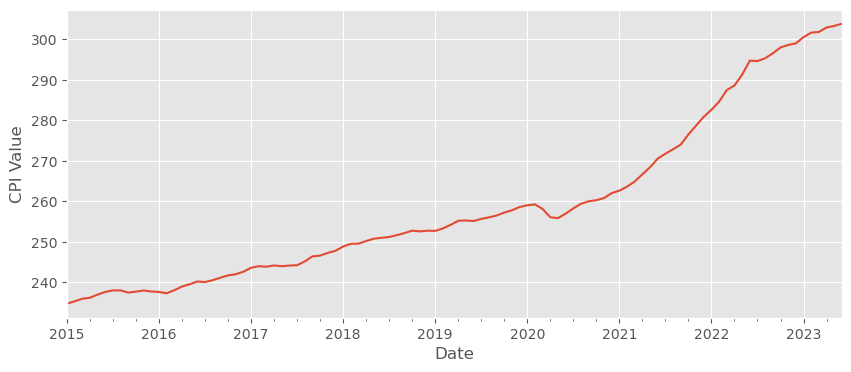

In [114]:
fig = plt.figure(dpi=100)
df_inflat['value'].loc['2015':'2024'].plot(figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('CPI Value')


In [118]:
df_inflat.head()

,date,value,year
dte,,,
1947-01-01,1947-01-01,21.48,1947
1947-02-01,1947-02-01,21.62,1947
1947-03-01,1947-03-01,22.00,1947
1947-04-01,1947-04-01,22.00,1947
1947-05-01,1947-05-01,21.95,1947


In [123]:
filtered_df = df_inflat.loc[(df_inflat['date'] >= '2015-01-01')]

print(filtered_df)


                 date    value  year
dte                                 
2015-01-01 2015-01-01  234.747  2015
2015-02-01 2015-02-01  235.342  2015
2015-03-01 2015-03-01  235.976  2015
2015-04-01 2015-04-01  236.222  2015
2015-05-01 2015-05-01  237.001  2015
...               ...      ...   ...
2023-02-01 2023-02-01  301.648  2023
2023-03-01 2023-03-01  301.808  2023
2023-04-01 2023-04-01  302.918  2023
2023-05-01 2023-05-01  303.294  2023
2023-06-01 2023-06-01  303.841  2023

[102 rows x 3 columns]


In [124]:
#Targeting a 2% inflation rate since 2015, add a line to same plot to starting with the 2015 value
#df_inflationrates['value'].loc['2015':'2023'].iloc[0]
start = df_inflat['value'].loc['2015':'2024'].iloc[0]

#set the periods to the length of the my date range
periods = get_unique_years(filtered_df).shape[0]

C:\Users\37065890\AppData\Local\Temp\ipykernel_29300\2418501872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\37065890\AppData\Local\Temp\ipykernel_29300\2418501872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year


In [125]:
start,periods

(234.747, 9)

In [139]:
#add function that calculates the 2% inflation rate
def get_target_cpi(previous_cpi):
    return previous_cpi + 0.02*(previous_cpi)

In [140]:
target_cpis = [start]
for year in range(0,periods):
    target_cpis.append(get_target_cpi(target_cpis[year]))

In [141]:
target_cpis

[234.747,
 239.44194000000002,
 244.23077880000002,
 249.115394376,
 254.09770226352,
 259.1796563087904,
 264.36324943496624,
 269.6505144236656,
 275.0435247121389,
 280.5443952063817]

In [142]:
len(target_cpis)

10

In [143]:
#Creating a pandas series for the target CPIs starting in 2015:
years = pd.date_range(start=datetime.datetime(2015,1,1),periods=periods+1,freq='YE')
#dates
target_cpi_series = pd.Series(data=target_cpis, index=years)

Text(0, 0.5, 'DFW CPI Value')

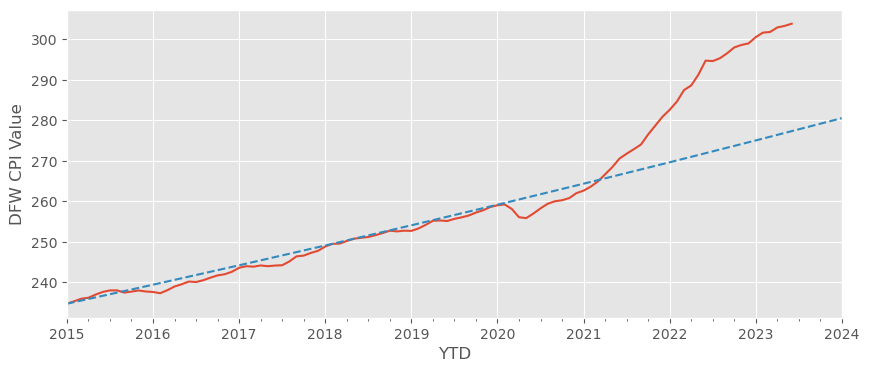

In [147]:
#plot out the figure
fig = plt.figure(dpi=100)
df_inflat['value'].loc['2015':'2023'].plot(figsize=(10,4))
target_cpi_series.plot(ls='--') 
plt.xlabel('YTD')
plt.ylabel('DFW CPI Value')

C:\Users\37065890\AppData\Local\Temp\ipykernel_14872\3283324454.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.axes.set_xticklabels(labels)


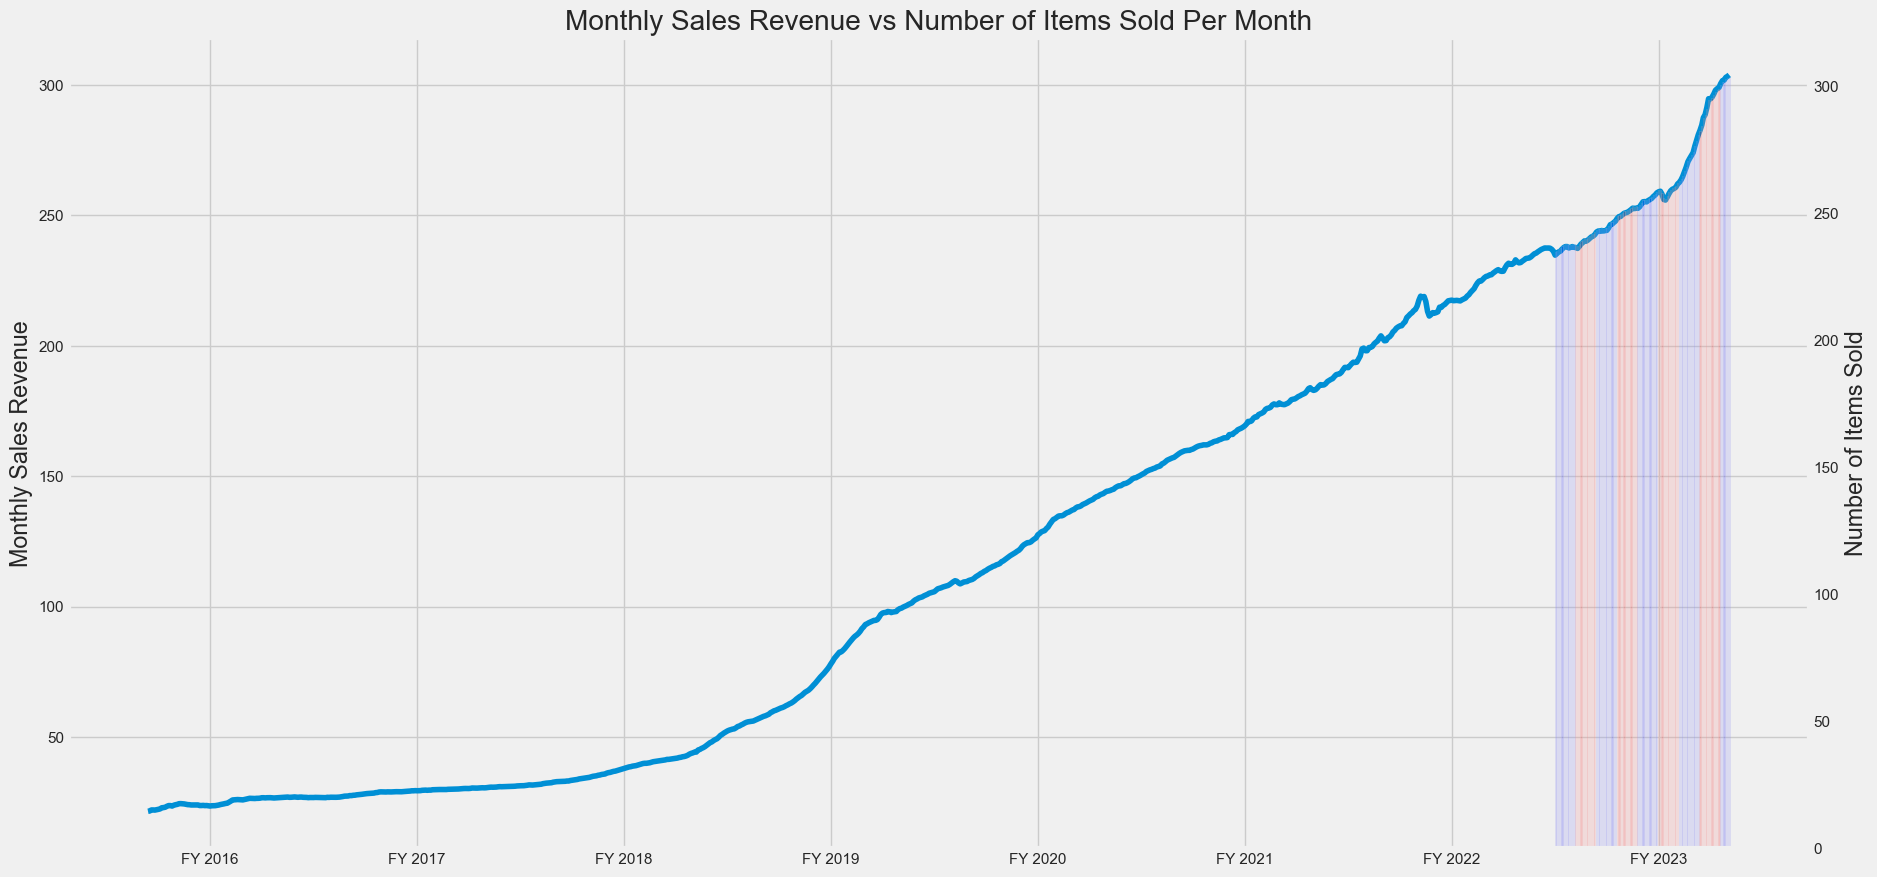

In [ ]:
""" plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
df_inflationrates.date = pd.to_datetime(df_inflationrates.date) #set the date column to datetime
df_inflationrates.set_index('date', inplace=True) #set the index to the date column
fy15_all = df_inflationrates[(df_inflationrates.index >= '2015-01-01') & (df_inflationrates.index < '2016-01-01')]
fy16_all = df_inflationrates[(df_inflationrates.index >= '2016-01-01') & (df_inflationrates.index < '2017-01-01')]
fy17_all = df_inflationrates[(df_inflationrates.index >= '2017-01-01') & (df_inflationrates.index < '2018-01-01')]
fy18_all = df_inflationrates[(df_inflationrates.index >= '2018-01-01') & (df_inflationrates.index < '2019-01-01')]
fy19_all = df_inflationrates[(df_inflationrates.index >= '2019-01-01') & (df_inflationrates.index < '2020-01-01')]
fy20_all = df_inflationrates[(df_inflationrates.index >= '2020-01-01') & (df_inflationrates.index < '2021-01-01')]
fy21_all = df_inflationrates[(df_inflationrates.index >= '2021-01-01') & (df_inflationrates.index < '2022-01-01')]
fy22_all = df_inflationrates[(df_inflationrates.index >= '2022-01-01') & (df_inflationrates.index < '2023-01-01')]
fy23_all = df_inflationrates[(df_inflationrates.index >= '2023-01-01') & (df_inflationrates.index < '2024-01-01')]
# Let's build our plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(df_inflationrates.value) #plot the value on axis #1
# the next few lines plot the fiscal year data as bar plots and changes the color for each.
ax2.bar(fy15_all.index, fy15_all.value,width=20, alpha=0.2, color='blue')
ax2.bar(fy16_all.index, fy16_all.value,width=20, alpha=0.2, color='red')
ax2.bar(fy17_all.index, fy17_all.value,width=20, alpha=0.2, color='blue')
ax2.bar(fy18_all.index, fy18_all.value,width=20, alpha=0.2, color='red')
ax2.bar(fy19_all.index, fy19_all.value,width=20, alpha=0.2, color='blue')
ax2.bar(fy20_all.index, fy20_all.value,width=20, alpha=0.2, color='red')
ax2.bar(fy21_all.index, fy21_all.value,width=20, alpha=0.2, color='blue')
ax2.bar(fy22_all.index, fy22_all.value,width=20, alpha=0.2, color='red')
ax2.bar(fy23_all.index, fy23_all.value,width=20, alpha=0.2, color='blue')
ax2.grid(False) # turn off grid #2
ax1.set_title('Monthly Sales Revenue vs Number of Items Sold Per Month')
ax1.set_ylabel('Monthly Sales Revenue')
ax2.set_ylabel('Number of Items Sold')
# Set the x-axis labels to be more meaningful than just some random dates.
labels = ['FY 2015', 'FY 2016','FY 2017', 'FY 2018','FY 2019', 'FY 2020', 'FY 2021', 'FY 2022', 'FY 2023']
ax1.axes.set_xticklabels(labels)
plt.show()
 """